# Output Consistency Testing Exercise
### Introduction
This exercise will guide you through assessing output consistency in language models. You will test the ability of a model to provide stable responses and analyze its performance using your own prompts and consistency metrics.

### Step 0: Setup
Import the required libraries. Ensure you have Hugging Face's Transformers library installed.

In [ ]:
# Import required packages
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Initialize the Language Model
Load the pre-trained GPT-2 model.

In [ ]:
# Load a text-generation model using Hugging Face Transformers
generator = pipeline("text-generation", model="gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


### Step 2: Define Your Own Prompts
Instead of predefined prompts, create and use your own simple test prompts. Make them diverse (e.g., factual questions, creative prompts).

In [ ]:
# Define your own prompts
prompts = [
    "Your first custom prompt here",
    "Another one here"
]

### Step 3: Generate Multiple Responses for Each Prompt
Test the model by running it multiple times for each prompt to collect data.

In [ ]:
# Define the number of runs and response length
num_runs = 5
max_length = 50

results = []

for prompt in prompts:
    for run in range(num_runs):
        response = generator(prompt, max_length=max_length, num_return_sequences=1)
        results.append({"Prompt": prompt, "Run": run + 1, "Response": response[0]["generated_text"]})

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for 

### Step 4: Analyze Consistency of Responses
Calculate unique responses and the consistency ratio for each prompt.

In [ ]:
# Group responses and calculate consistency
analysis = df_results.groupby("Prompt")["Response"].apply(list).reset_index()

def calculate_consistency(responses):
    unique_responses = set(responses)
    consistency_ratio = len(unique_responses) / len(responses)
    return unique_responses, consistency_ratio

# Add consistency analysis
analysis["Unique_Responses"] = analysis["Response"].apply(lambda x: calculate_consistency(x)[0])
analysis["Consistency_Ratio"] = analysis["Response"].apply(lambda x: calculate_consistency(x)[1])

### Step 5: Save and Visualize Results
Analyze the bar chart and interpret what the consistency ratio means for each prompt.

                          Prompt  Consistency_Ratio
0               Another one here                1.0
1  Your first custom prompt here                1.0


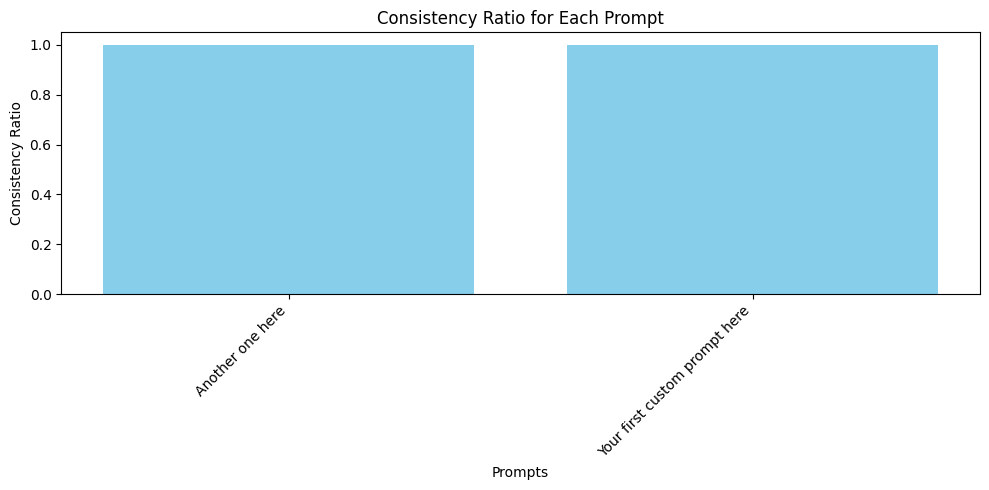

In [ ]:
# Save results to a CSV file
df_results.to_csv("output_consistency_results.csv", index=False)

# Print summary and visualize
print(analysis[["Prompt", "Consistency_Ratio"]])
plt.figure(figsize=(10, 5))
plt.bar(analysis["Prompt"], analysis["Consistency_Ratio"], color='skyblue')
plt.title("Consistency Ratio for Each Prompt")
plt.xlabel("Prompts")
plt.ylabel("Consistency Ratio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Exercise Questions

1. Create a brief explanation of the consistency ratio for one of your prompts.
2. How does variability in responses affect the trustworthiness of a language model?
3. Which prompt in your test had the highest consistency, and why do you think that is the case?